# Soft Margin Classifier

This concept require knowledge of Maximal Margin Classifier

You can learn it from [here](https://github.com/Gladiator07/Machine-Learning-Complete/blob/master/Support%20Vector%20Machine/1.Maximal%20Margin%20Classifier.ipynb)

If we strictly impose that all instances must be off the street and on the right side, this is called hard margin classifier.

There are two main issues with hard margin classification

First, it works only if the data is linearly seperable. Second, it is sensitive to outliers
  
The following figure, shows the iris dataset with just one additional outlier: on the left, it is impossible to gind a hard margin; on the right, the decision boundary ends up very different from the one we saw in the previous notebook without the outlier, and it will probably not generalize as well.

![image](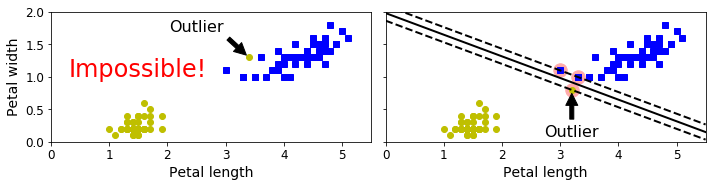%0A)

In practice, real data is messy and cannot be seperated perfectly with a hyperplane

To avoid all of these issues, we use a more flexible model. This allows some points in the training data to violate the seperating line.

The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (i.e., the instances that end up in the middle of the street or even on the wrong side)

***This is called soft margin classification***

A tuning parameter is introduced called simply C that defines the magnitude of the wiggle allowed across all dimensions. The C parameters defines the amount of violation of the margin allowed. A C=0 is no violation and we are back to the inflexible Maximal-Margin Classifier described above. The larger the value of C the more violations of the hyperplane are permitted.

C, here is a hyperparameter, which we have to set according to our use case

During the learning of the hyperplane from data, all training instances that lie within the distance of the margin will affect the placement of the hyperplane and are referred to as support vectors. 

And as C affects the number of instances that are allowed to fall within the margin, C influences the number of support vectors used by the model.

- The smaller the value of C, the more sensitive the algorithm is to the training data (higher variance and lower bias).
- The larger the value of C, the less sensitive the algorithm is to the training data (lower variance and higher bias).

### Effects of outliers

So by all this discussion till now, you must be wandering that if SVM are affected by outliers or not

Short answer is no

In SVM what we do is find out the best hyperplane which seperates the classes. 

Hard Margin Classifier works well with linear data.

But in reality, linear data is very much rare.

So, we give some slack (C) to the algorithm to make some mistakes which makes it more robust

To determine the hyperplane we use support vectors, which are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maxmize the margin of the classifier. 

![image](https://miro.medium.com/max/875/0*ecA4Ls8kBYSM5nza.jpg)

Deleting the support vectors will change the position of the hyperplane. These are the oints that help us to build our SVM

SVM doesn't care about the points other than support vectors

This is the reason that SVM are not affected by outliers and quite robust in handling them

We also are not required to scale or remove the outliers in case of using SVM on our data

## Large Margin Intuition

In logistic regression, we take the output of the linear function and squash the value within the range of [0,1] using the sigmoid function. 

If the squashed value is greater than a threshold value(0.5) we assign it a label 1, else we assign it a label 0. 

In SVM, we take the output of the linear function and if that output is greater than 1, we identify it with one class and if the output is -1, we identify is with another class. 

Since the threshold values are changed to 1 and -1 in SVM, we obtain this reinforcement range of values([-1,1]) which acts as margin.

## Cost Function and Gradient Updates

In the SVM algorithm, we are looking to maximize the margin between the data points and the hyperplane. The loss function that helps maximize the margin is hinge loss

Note: Hinge loss will be discussed in detail in further notebooks

![image](https://miro.medium.com/max/554/1*3xErahGeTFnbDiRuNXjAuA.png)

The cost is 0 if the predicted value and the actual value are of the same sign. If they are not, we then calculate the loss value. We also add a regularization parameter the cost function. The objective of the regularization parameter is to balance the margin maximization and loss. After adding the regularization parameter, the cost functions looks as below.


![image](https://miro.medium.com/max/875/1*GQAd28bK8LKOL2kOOFY-tg.png)

Now that we have the loss function, we take partial derivatives with respect to the weights to find the gradients. Using the gradients, we can update our weights.

![image](https://miro.medium.com/max/875/1*WUphtYLfTOAoaXQXvImBeA.png) 

*Gradients*

When there is no misclassification, i.e our model correctly predicts the class of our data point, we only have to update the gradient from the regularization parameter.

![image](https://miro.medium.com/max/385/1*-nKEXrWos8Iuf-DWSv_srQ.png) 

*Gradient Update - No misclassification*

When there is a misclassification, i.e our model make a mistake on the prediction of the class of our data point, we include the loss along with the regularization parameter to perform gradient update.

![image](https://miro.medium.com/max/535/1*tnvMhAKaTUCO43diEvtTAQ.png)

*Gradient Update - Misclassification*

Hinge loss, learning of SVM will be discussed in great detail in further notebooks

## Implementation using Sci-kit learn

The following Scikit-Learn code loads the iris dataset, scales the features, and then trains a linear SVM model (using the LinearSVC class with C=1 and the hinge loss function, described shortly) to detect Iris virginica flowers:

In [1]:
#Importing libraries
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()

In [11]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
# Flowers to classify (target variables)
print(iris.target_names)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [15]:
X = iris["data"][:, (2,3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # iris virginica

In [16]:
# Creating a pipeline which first standardize the data and apply linear support vector
# classifier with C=1 and loss function as hinge
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [17]:
# Predicting
svm_clf.predict([[5.5, 1.7]])

array([1.])

***Unlike Logistic Regression, SVM classifiers do not output probabilities for each class***

Instead of using the LinearSVC class, we could use the SVC class with a linear kernel. 

When creating the SVC model, we would write SVC(kernel="linear", C=1). 

Or we could use the SGDClassifier class, with SGDClassifier(loss="hinge", alpha=1/ (m*C)). 

This applies regular Stochastic Gradient Descent to train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it can be useful to handle online classification tasks or huge datasets that do not fit in memory (out-of-core training).

The LinearSVC class regularizes the bias term, so you should center the training set first by subtracting its mean. This is automatic if you scale the data using the StandardScaler. 

Also make sure you set the loss hyperparameter to "hinge", as it is not the default value. Finally, for better performance, you should set the dual hyperparameter to False, unless there are more features than training instances

Note that SVM requires scaling the data. It won't work efficiently if the data is not standardized or normalized

In the following notebooks we will see how to do Non-Linear SVM classification and the kernel trick

### Other References:
- [SVC implemented from scratch in pure python](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)
- [Krish Naik](https://www.youtube.com/watch?v=H9yACitf-KM)
- [Statquest](https://www.youtube.com/watch?v=H9yACitf-KM)
- [SVC docs](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [Linear SVC docs](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
- [SGD Classifier docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)